In [10]:
import seaborn as sns
import sys
from scipy.ndimage import measurements
from scipy.ndimage.filters import gaussian_filter
from pylab import *

In [11]:
sns.set()
sys.path.insert(0, '/home/andreas/Code/Software/Diamond_Square')
rcParams['figure.figsize'] = [7, 7]

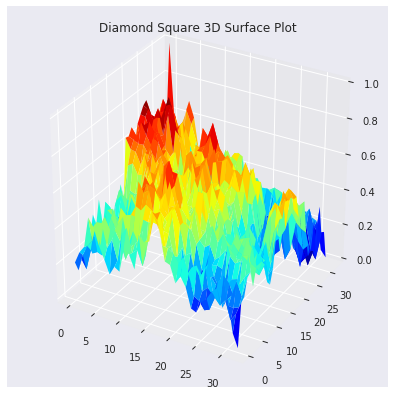

In [12]:
from methods import *

ds_steps = 5
p = 0.5
max_rnd = 1.0
plot_type = '3d'

max_index = 2**ds_steps
seeded_map = f_seed_grid(2**ds_steps+1, max_rnd)
final_height_map = f_dsmain(seeded_map, ds_steps, max_index, max_rnd)

final_height_map += abs(final_height_map.min())
final_height_map /= abs(final_height_map.max())

final_blurred = gaussian_filter(final_height_map, sigma=0)
f_plotting(final_blurred, max_index, plot_type)

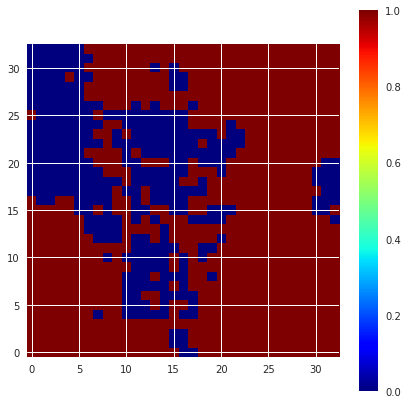

In [13]:
z = final_blurred < p

imshow(z, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
show()

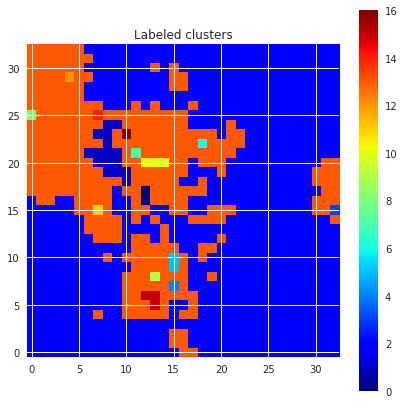

In [14]:
lw, num = measurements.label(z)

b = arange(lw.max() + 1)
shuffle(b)
shuffledLw = b[lw]
imshow(shuffledLw, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Labeled clusters")
show()

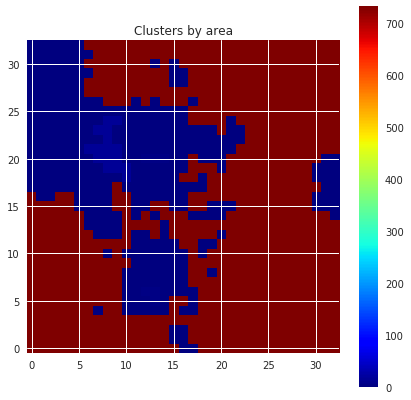

In [15]:
area = measurements.sum(z, lw, index=arange(lw.max() + 1))
areaImg = area[lw]
imshow(areaImg, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Clusters by area")
show()

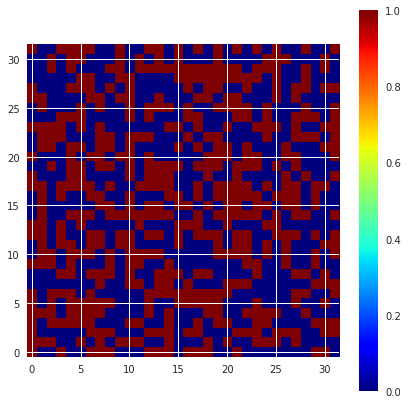

In [16]:
L = 2**ds_steps
r = rand(L,L)
z = r < p

imshow(z, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
show()

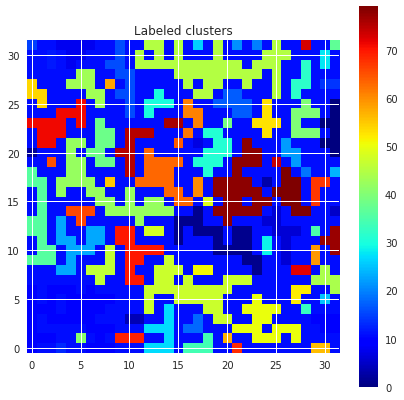

In [17]:
lw, num = measurements.label(z)

b = arange(lw.max() + 1)
shuffle(b)
shuffledLw = b[lw]
imshow(shuffledLw, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Labeled clusters")
show()

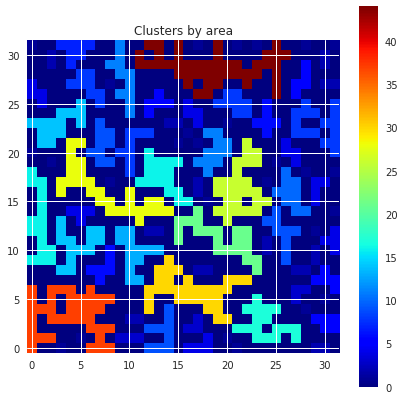

In [18]:
area = measurements.sum(z, lw, index=arange(lw.max() + 1))
areaImg = area[lw]
im3 = imshow(areaImg, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Clusters by area")
show()